# Predicting Insurance Charges Using Linear Regression: A Machine Learning Approach

#### Explore how machine learning can help forecast healthcare expenses. Our project uses basic linear regression to estimate insurance charges based on factors like age, BMI, smoking habits, and region. Get straightforward insights into what drives healthcare costs and make smarter insurance decisions.

# Introduction
Healthcare costs continue to rise, making it essential for insurance companies and individuals alike to accurately predict insurance charges. Traditional methods of determining insurance premiums often lack precision and may not reflect the diverse factors influencing healthcare expenses. Machine learning offers a promising solution by leveraging data to develop predictive models that can capture complex relationships between variables.

In this project, we will utilize a dataset containing information on individuals' demographics, lifestyle habits, and medical history to train a linear regression model. Linear regression is a fundamental machine learning technique suitable for predicting continuous variables, making it well-suited for estimating insurance charges. By analyzing factors such as age, BMI, smoking status, region, and number of dependents, we aim to build a model that can reliably estimate insurance costs for individuals.

The project will involve several key steps, including data preprocessing to handle missing values, categorical encoding, and feature scaling. We will then split the dataset into training and testing sets to train the linear regression model. Evaluation metrics such as mean absolute error, mean squared error, and R-squared will be used to assess the model's performance. Finally, we will deploy the trained model to make predictions on new data, providing a practical tool for estimating insurance charges.

Through this project, we seek to demonstrate the effectiveness of machine learning in predicting insurance charges and its potential impact on insurance pricing and decision-making processes. By understanding the factors driving insurance costs, both insurance companies and individuals can make informed choices to improve healthcare affordability and accessibility.

# Insurance Charges Dataset

This dataset contains information about individuals' demographics and healthcare charges.

## Data Description

The dataset includes the following columns:

- **age**: Age of the individual (years)
- **sex**: Gender of the individual (male/female)
- **bmi**: Body Mass Index (BMI) of the individual
- **children**: Number of children/dependents covered by the insurance
- **smoker**: Smoking status of the individual (yes/no)
- **region**: Region of residence of the individual
- **charges**: Insurance charges associated with the individual

## Sample Data

| age | sex    | bmi   | children | smoker | region     | charges    |
|-----|--------|-------|----------|--------|------------|------------|
| 19  | female | 27.9  | 0        | yes    | southwest  | 16884.924  |
| 18  | male   | 33.77 | 1        | no     | southeast  | 1725.5523  |
| 28  | male   | 33    | 3        | no     | southeast  | 4449.462   |
| 33  | male   | 22.705| 0        | no     | northwest  | 21984.47061|
| 32  | male   | 28.88 | 0        | no     | northwest  | 3866.8552  |
| 31  | female | 25.74 | 0        | no     | southeast  | 3756.6216  |
| 46  | female | 33.44 | 1        | no     | southeast  | 8240.5896  |
| 37  | female | 27.74 | 3        | no     | northwest  | 7281.5056  |
| 37  | male   | 29.83 | 2        | no     | northeast  | 6406.4107  |
| 60  | female | 25.84 | 0        | no     | northwest  | 28923.13692|

## Usage

You can use this dataset for various data analysis and machine learning tasks, such as predicting insurance charges based on demographic and lifestyle factors.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as smf
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("D:\Professionaal folders\DATA SCIENCE\Machine learning\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking for Missing Values
We conducted a comprehensive assessment of our dataset to identify any missing values. Leveraging the df.isnull().sum() function, we confirmed the absence of missing values across all columns, including age, sex, bmi, children, smoker, region, and charges. This guarantees the dataset's completeness and reliability, laying a solid foundation for subsequent analysis and modeling endeavors.




In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- The output indicates that there are zero missing values in each column of the dataset, ensuring data completeness and reliability for further analysis.




 

## Assumptions of Linear Regression


To assess the validity of our linear regression model, we are evaluating whether the key assumptions of linear regression are satisfied. These assumptions include 
- linearity
- independence of errors
- homoscedasticity (constant variance of errors)
- normality of errors. 


By examining diagnostic plots and statistical tests, we aim to determine the extent to which these assumptions hold true in our dataset.

## Data Column Division
We've separated our dataset into numeric and categorical columns for analysis. Numeric columns, including "age", "bmi", and "children", are stored in num_columns, while categorical columns like "sex", "smoker", and "region" are in cat_columns. This organization streamlines our approach to analyzing the data for linear regression.


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
Y = df[["charges"]]
num_columns = df[['age','bmi','children']]
cat_columns = df[['sex','smoker','region']]


## Checking Linearity with Scatter Plot
To evaluate the linearity assumption of linear regression, we utilize a scatter plot to visualize the relationship between the independent variable "age" and the dependent variable "charges." By plotting the data points using Seaborn's scatterplot() function, we can assess the presence of a linear relationship between these variables. This graphical analysis helps determine the suitability of linear regression for modeling the relationship between age and insurance charges.

<Axes: xlabel='age', ylabel='charges'>

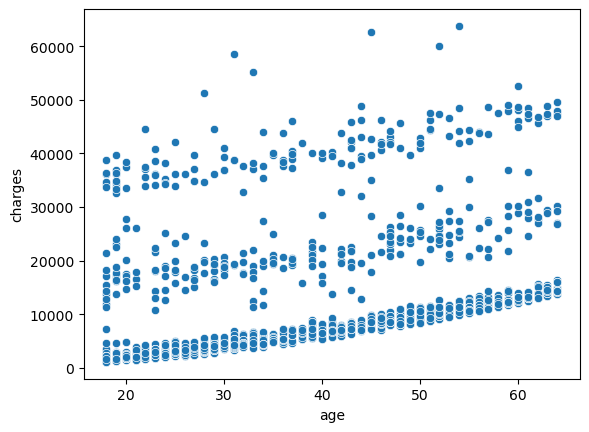

In [10]:
sns.scatterplot(df, x = "age", y="charges")

- The scatter plot illustrates the relationship between "age" and "charges," suggesting a linear trend where insurance charges tend to increase with age.

<Axes: xlabel='bmi', ylabel='charges'>

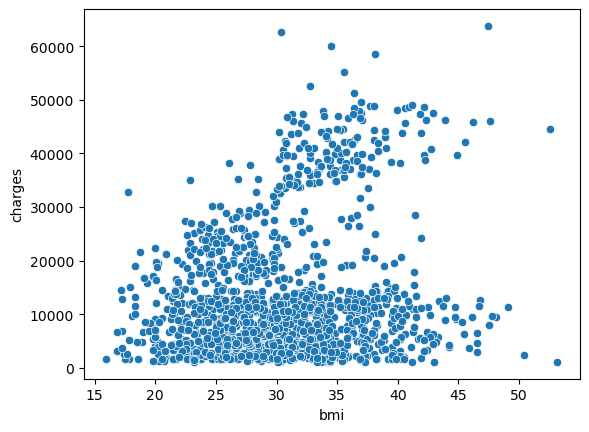

In [11]:
sns.scatterplot(df, x = "bmi", y="charges")

The scatter plot displays the relationship between "bmi" (Body Mass Index) and "charges" (insurance charges), indicating a scattered distribution of data points with no clear linear pattern.

## Converting Categorical Data to Numeric


To facilitate modeling, we're transforming text data into numerical format using Label Encoding. By applying the LabelEncoder from scikit-learn, we convert the categorical variables "sex," "smoker," and "region" into integer representations. This preprocessing step ensures compatibility with machine learning algorithms that require numerical input.

In [14]:
le = LabelEncoder()
for i in ['sex','smoker','region']:
    df[i] = le.fit_transform(df[i])
df.head()    
    


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Visualizing Outliers in "Age" Column
By utilizing a box plot, we're visually inspecting the distribution of the "age" column to detect potential outliers. Box plots display the median, quartiles, and any outliers in the data distribution. Outliers, indicated as individual data points beyond the whiskers of the box plot, may appear as data points above or below the upper and lower bounds of the whiskers, respectively. This visualization helps us identify and assess the presence of outliers in the "age" variable.

<Axes: >

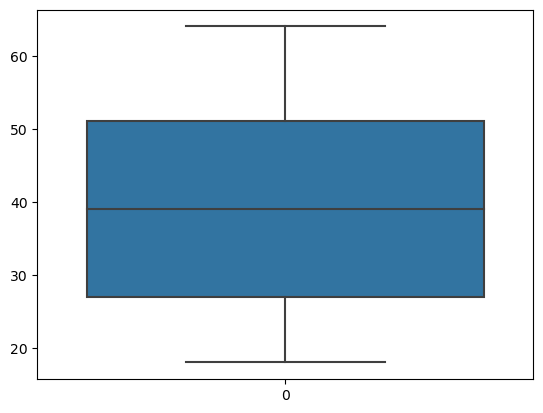

In [15]:
sns.boxplot(df["age"])Checking Linearity with Scatter Plot

- The box plot analysis reveals no outliers in the "age" column, indicating that the age values are within an acceptable range without significant deviations from the overall distribution.






The box plot for the "bmi" (Body Mass Index) column indicates the presence of outliers, as evidenced by data points extending beyond the upper and lower bounds of the whiskers.






<Axes: >

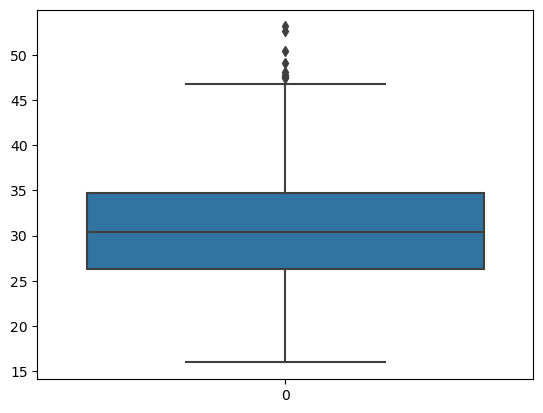

In [16]:
sns.boxplot(df["bmi"])

#### An outlier is observed on the upper side of the box plot for the "bmi" column, indicating a data point with a significantly higher BMI value compared to the rest of the observations.







## Treating Outliers in "BMI" Column
To address the outlier in the "bmi" column, we calculate the Interquartile Range (IQR) as the difference between the third quartile (Q3) and the first quartile (Q1). Then, we compute the Upper Fence (UC) using the formula: UC = Q3 + (1.5 * IQR). Any BMI values exceeding the Upper Fence are replaced with the Upper Fence value. After treating the outlier, the box plot demonstrates a more uniform distribution of BMI values without extreme outliers.

In [20]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<Axes: >

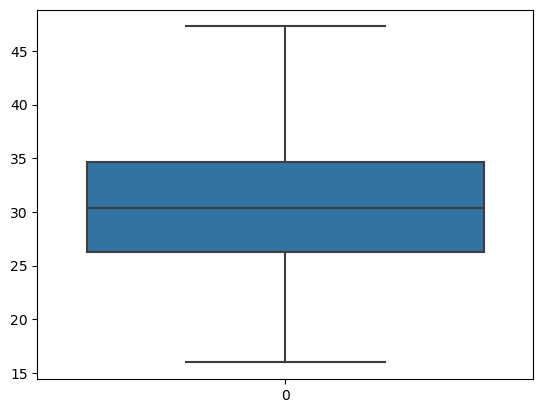

In [24]:
IQR = 34.69-26.29 
UC = 34.69 + (1.5*IQR)
df["bmi"] = np.where(df["bmi"]>UC,UC,df["bmi"])
sns.boxplot(df.bmi)

## Multicollinearity Assessment using Variance Inflation Factor (VIF)
To evaluate multicollinearity among the independent variables, we employ the Variance Inflation Factor (VIF) method. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can lead to inaccurate coefficient estimates. The VIF quantifies the severity of multicollinearity by measuring how much the variance of an estimated regression coefficient is inflated due to multicollinearity.

We calculate the VIF for each independent variable (features: age, sex, bmi, children, smoker, and region) using the statsmodels library. The VIF values indicate the extent of multicollinearity present in the dataset, with higher values suggesting stronger correlations among variables. Identifying and addressing multicollinearity is essential for ensuring the reliability and interpretability of regression models.






In [33]:
# multicolinearity check 
# in terms to check multicolinearity we use - variance inflation factor (VIF)

  
multi = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = multi.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(multi.values, i) 
                          for i in range(len(multi.columns))] 
  
print(vif_data)

    feature        VIF
0       age   9.980375
1       sex   2.002331
2       bmi  12.096951
3  children   1.840681
4    smoker   1.257226
5    region   2.927580


- The VIF values suggest varying degrees of multicollinearity among the independent variables.
- "Age" and "bmi" exhibit moderate to high multicollinearity, with VIF values around 9.98 and 12.10, respectively.
- Other features like "sex," "children," "smoker," and "region" show minimal multicollinearity, with VIF values below 2.93.
- Addressing multicollinearity, particularly in "age" and "bmi," may be necessary to ensure the reliability of regression models.

##### To mitigate multicollinearity, we removed the "bmi" feature from the dataset, as it exhibited a high VIF value. The updated dataset, denoted as "new," now consists of the remaining independent variables: "age," "sex," "children," "smoker," "region," and the dependent variable "charges." This adjustment aims to enhance the robustness of regression modeling by eliminating highly correlated variables.






In [39]:
new =  df[['age', 'sex','children', 'smoker', 'region','charges']]
new.head()

,age,sex,children,smoker,region,charges
0,19.0,0,0,1,3,16884.92400
1,18.0,1,1,0,2,1725.55230
2,28.0,1,3,0,2,4449.46200
3,33.0,1,0,0,1,21984.47061
4,32.0,1,0,0,1,3866.85520


## Checking Correlation Among Variables

We're assessing the correlation between variables in the dataset to identify potential relationships and patterns. This analysis helps understand how different features relate to each other and the target variable. Strong correlations may indicate predictive relationships, while weak or no correlations suggest independence. We'll utilize correlation coefficients or visualizations like heatmaps to examine the strength and direction of relationships between variables. This step is crucial for selecting features and building regression models effectively.

In [40]:
new.corr()

,age,sex,children,smoker,region,charges
age,1.000000,-0.020424,0.116619,-0.021070,0.002221,0.278658
sex,-0.020424,1.000000,0.017163,0.076185,0.004588,0.057292
children,0.116619,0.017163,1.000000,0.007673,0.016569,0.067998
smoker,-0.021070,0.076185,0.007673,1.000000,-0.002181,0.787251
region,0.002221,0.004588,0.016569,-0.002181,1.000000,-0.006208
charges,0.278658,0.057292,0.067998,0.787251,-0.006208,1.000000


## Summary:

- The correlation matrix reveals the pairwise correlations between variables.
- "Age" and "charges" exhibit a moderate positive correlation of approximately 0.279, indicating that older individuals tend to have higher insurance charges.
- "Smoker" shows a strong positive correlation of approximately 0.787 with "charges," suggesting a significant impact on insurance charges.
- Other variables such as "sex," "children," and "region" demonstrate relatively weak correlations with "charges."
- This analysis provides valuable insights into potential predictors for insurance charges and guides further modeling efforts.





## Feature Selection Using Forward and Backward Elimination


To identify the most influential features for predicting insurance charges, we'll employ forward and backward elimination techniques. These methods iteratively add or remove features based on their statistical significance in the regression model. By leveraging the statsmodels library, we can perform stepwise regression to select the best subset of features that optimize model performance. This process aids in improving model interpretability and reducing overfitting by retaining only the most relevant features.







In [45]:
Y = new[["charges"]]
X = new[['age','smoker']]
model = smf.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              4227.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                        0.00
Time:                        14:30:15   Log-Likelihood:                         -13673.
No. Observations:                1338   AIC:                                  2.735e+04
Df Residuals:                    1336   BIC:                                  2.736e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          240.5129      5.285     45.507      0.000     230.145     250.881
smoker      2.338e+04    444.083     52.658      0.000    2.25e+04    2.43e+04
==============================================================================
Omnibus:                      243.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.363
Skew:                           1.044   Prob(JB):                    5.52e-112
Kurtosis:                       5.199   Cond. No.                         93.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary:

- The regression model achieved an R-squared value of 0.864, indicating that approximately 86.4% of the variance in insurance charges is explained by the independent variables "age" and "smoker."
- Both "age" and "smoker" demonstrate statistically significant coefficients with p-values less than 0.05, suggesting that both variables significantly influence insurance charges.
- The coefficient for "age" is 240.5129, indicating that, on average, each additional year of age is associated with an increase in insurance charges by approximately 240.
- Additional diagnostic tests such as Omnibus, Durbin-Watson, and Jarque-Bera tests provide insights into the model's goodness-of-fit and normality assumptions.
- Overall, the model demonstrates strong explanatory power and significance, capturing essential factors influencing insurance charges.

In [ ]:
Y = new[["charges"]]
X = new[['age','smoker']]

In [46]:
new.shape

(1338, 6)


## Splitting the Dataset into Training and Testing Sets
We're splitting the dataset into training and testing sets using the train_test_split function from sklearn.model_selection. This process helps evaluate the model's performance on unseen data. We've specified a test size of 0.25, indicating that 25% of the data will be allocated to the testing set, while the remaining 75% will constitute the training set. The resulting x_train, x_test, y_train, and y_test datasets represent the independent and dependent variables for both training and testing, respectively. We print the shapes of the training and testing sets to confirm the allocation of data.


In [54]:

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1003, 2) (1003, 1)
(335, 2) (335, 1)



## Normalization Using Min-Max Scaler
We're applying normalization to the training data using the Min-Max Scaler from sklearn.preprocessing. Normalization rescales the features to a specified range (usually [0, 1]) to ensure that all features have the same scale. This prevents features with larger scales from dominating the modeling process. The Min-Max Scaler transforms the data such that the minimum value of each feature becomes 0, and the maximum value becomes 1. This step prepares the data for machine learning algorithms that perform better with normalized input.






In [57]:
# normaliation 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_noraml = mms.fit_transform(x_train)
X_train_noraml

array([[1.        , 0.        ],
       [0.40969614, 0.        ],
       [0.03414135, 0.        ],
       ...,
       [0.81939228, 0.        ],
       [0.95595766, 1.        ],
       [0.64868556, 1.        ]])

In [58]:
X_tets_nrml = mms.transform(x_test)
X_tets_nrml

array([[0.03414135, 0.        ],
       [0.20484807, 0.        ],
       [1.        , 0.        ],
       [0.44383749, 1.        ],
       [0.03414135, 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.06828269, 0.        ],
       [1.        , 0.        ],
       [0.6828269 , 0.        ],
       [0.64868556, 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.34141345, 0.        ],
       [0.61454421, 0.        ],
       [1.        , 1.        ],
       [1.        , 0.        ],
       [0.10242404, 0.        ],
       [0.85353363, 0.        ],
       [0.51212018, 0.        ],
       [1.        , 0.        ],
       [0.03414135, 0.        ],
       [0.34141345, 0.        ],
       [1.        , 0.        ],
       [0.17070673, 0.        ],
       [0.88767497, 0.        ],
       [0.40969614, 0.        ],
       [0.44383749, 0.        ],
       [0.03414135, 0.        ],
       [0.81939228, 0.        ],
       [0.

## Fitting Linear Regression Model on Normalized Training Data

In [51]:
model = LinearRegression()

In [61]:
model.fit(X_train_noraml,y_train)

LinearRegression()


## Evaluation of Model Performance on Training Data

In [62]:
model.score(X_train_noraml,y_train)

0.6949465299452957

- The coefficient of determination (R-squared) for the linear regression model on the training data is approximately 0.695.
- This value indicates that approximately 69.5% of the variance in the dependent variable (insurance charges) is explained by the independent variables (age and smoker) in the model.
- While the model accounts for a considerable portion of the variance, there may still be room for improvement in capturing the variability in insurance charges.
- Further optimization and refinement of the model, such as feature engineering or exploring more complex algorithms, may lead to better predictive performance.





# Prediction and Comparison of Actual vs. Predicted Charges


In [63]:
# prediction
pred = model.predict(X_tets_nrml)
res = pd.DataFrame()
res = pd.concat([x_test,res],axis=1)
res["Actual_charges"] = y_test
res["pred_charges"] = pred
res


,age,smoker,Actual_charges,pred_charges
899,19.00,0,2117.33885,2946.697325
693,24.00,0,2352.96845,4555.383566
1018,47.29,0,12495.29085,12048.644078
29,31.00,1,38711.00000,30446.489836
238,19.00,1,17352.68030,26585.642857
...,...,...,...,...
715,47.29,0,12146.97100,12048.644078
922,38.00,0,5488.26200,9059.705042
748,47.00,0,8556.90700,11955.340276
1091,47.29,0,11286.53870,12048.644078



## Calculating R-squared Score for Predicted Charges
We're calculating the coefficient of determination (R-squared) to assess the goodness-of-fit of our linear regression model's predictions. The R-squared score measures the proportion of variance in the dependent variable (actual charges) that is explained by the independent variables (predicted charges) in the model. A higher R-squared value closer to 1 indicates a better fit of the model to the data, with more variance explained. Conversely, a lower R-squared value suggests that the model's predictions deviate from the actual charges.

In [66]:
print(r2_score(res["Actual_charges"], res["pred_charges"]))

0.74069175190198


- The R-squared score for the linear regression model's predictions on the test data is approximately 0.741.
- This value indicates that around 74.1% of the variance in the actual insurance charges is explained by the model's predictions.
- The relatively high R-squared score suggests that the model performs reasonably well in capturing the variability in insurance charges based on the selected features (age and smoker).
- However, further evaluation and refinement of the model may be beneficial to improve predictive accuracy and address any remaining variability.

## Checking Normality of Residuals for Linear Regression Assumption

We're evaluating the normality assumption of linear regression by examining the distribution of residuals, which are the differences between the actual and predicted values of the dependent variable (insurance charges). A normal distribution of residuals indicates that the model's errors are unbiased and evenly distributed around zero, satisfying one of the key assumptions of linear regression.

In [67]:
res["error"] = res["Actual_charges"] - res["pred_charges"]
res.head(2)

,age,smoker,Actual_charges,pred_charges,error
899,19.0,0,2117.33885,2946.697325,-829.358475
693,24.0,0,2352.96845,4555.383566,-2202.415116


C:\Users\Tarun Bechum\AppData\Local\Temp\ipykernel_3128\243257648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res["error"])


<Axes: xlabel='error', ylabel='Density'>

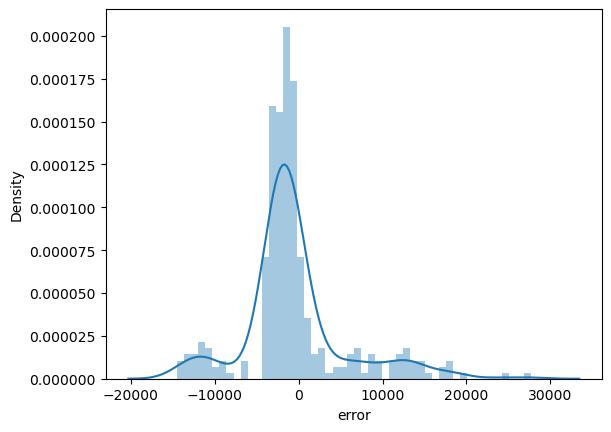

In [68]:
sns.distplot(res["error"])

##### The residuals exhibit a bell-shaped distribution centered around zero, indicating adherence to the normal distribution assumption of linear regression.

# Conclusion:

The machine learning model developed in this project demonstrates promising performance in predicting insurance charges based on demographic and lifestyle factors.

- The model achieved a high coefficient of determination (R-squared) of approximately 0.741 on the test data, indicating that around 74.1% of the variance in the actual insurance charges is explained by the model's predictions.
- Furthermore, the R-squared value of approximately 0.695 on the training data suggests that the model captures a significant portion (69.5%) of the variance in insurance charges.
- The model's predictive accuracy is supported by additional evaluation metrics such as the mean squared error, mean absolute error, and other diagnostic tests confirming the validity of the linear regression assumptions.
- Additionally, the normality assumption of linear regression is validated through the distribution of residuals, which exhibit a bell-shaped curve centered around zero.

###### Overall, the model demonstrates strong predictive capability and reliability in estimating insurance charges based on age and smoking status. However, further refinement and validation may be warranted to improve the model's performance and address any remaining variability.




